In [0]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

gr = pd.DataFrame()
ADANIPORTS = pd.read_csv('ADANIPORTS.csv')
gr['Adaniports'] = ADANIPORTS['Close Price']
ASIANPAINT = pd.read_csv('ASIANPAINT.csv')
gr['ASIANPAINT'] = ASIANPAINT['Close Price']
AXISBANK = pd.read_csv('AXISBANK.csv')
gr['AXISBANK'] = AXISBANK['Close Price']
BAJFINANCE = pd.read_csv('BAJFINANCE.csv')
gr['Bajfinance'] = BAJFINANCE['Close Price']
BPCL = pd.read_csv('BPCL.csv')
gr['Bpcl'] = BPCL['Close Price']
CIPLA = pd.read_csv('CIPLA.csv')
gr['CIPLA'] = CIPLA['Close Price']
DRREDDY = pd.read_csv('DRREDDY.csv')
gr['DRREDDY'] = DRREDDY['Close Price']
EICHERMOT = pd.read_csv('EICHERMOT.csv')
gr['Eichermot'] = EICHERMOT['Close Price']
GAIL = pd.read_csv('GAIL.csv')
gr['GAIL'] = GAIL['Close Price']
HDFC = pd.read_csv('HDFC.csv')
gr['HDFC'] = HDFC['Close Price']
HDFCBANK = pd.read_csv('HDFCBANK.csv')
gr['HDFCBANK'] = HDFCBANK['Close Price']
HEROMOTOCO = pd.read_csv('HEROMOTOCO.csv')
gr['HEROMOTOCO'] = HEROMOTOCO['Close Price']
HINDALCO = pd.read_csv('HINDALCO.csv')
gr['HINDALCO'] = HINDALCO['Close Price']
HINDUNILVR = pd.read_csv('HINDUNILVR.csv')
gr['HINDUNILVR'] = HINDUNILVR['Close Price']
IDFC= pd.read_csv('IDFC.csv')
gr['IDFC'] = IDFC['Close Price']
INFRATEL = pd.read_csv('INFRATEL.csv')
gr['INFRATEL'] = INFRATEL['Close Price']
INFY = pd.read_csv('INFY.csv')
gr['INFY'] = INFY['Close Price']
IOC = pd.read_csv('IOC.csv')
gr['IOC'] = IOC['Close Price']
ITC = pd.read_csv('ITC.csv')
gr['ITC'] = ITC['Close Price']
ITDC = pd.read_csv('ITDC.csv')
gr['ITDC'] = ITDC['Close Price']
LT = pd.read_csv('LT.csv')
gr['LT'] = LT['Close Price']
Mm = pd.read_csv('/content/M&M.csv')
gr['Mm'] = Mm['Close Price']
MARUTI = pd.read_csv('MARUTI.csv')
gr['MARUTI'] = MARUTI['Close Price']
NCC = pd.read_csv('NCC.csv')
gr['NCC'] = NCC['Close Price']
PVR = pd.read_csv('PVR.csv')
gr['Pvr'] = PVR['Close Price']
RCOM = pd.read_csv('RCOM.csv')
gr['Rcom'] = RCOM['Close Price']
RELIANCE = pd.read_csv('RELIANCE.csv')
gr['RELIANCE'] = RELIANCE['Close Price']
SUNPHARMA = pd.read_csv('SUNPHARMA.csv')
gr['SUNPHARMA'] = SUNPHARMA['Close Price']
TCS = pd.read_csv('TCS.csv')
gr['TCS'] = TCS['Close Price']
TITAN = pd.read_csv('TITAN.csv')
gr['TITAN'] = TITAN['Close Price']
gr['Date'] = ASIANPAINT['Date']
gr['Date'] = pd.to_datetime(gr['Date'])
gr.set_index('Date',inplace = True)


In [9]:
gr

,Adaniports,ASIANPAINT,AXISBANK,Bajfinance,Bpcl,CIPLA,DRREDDY,Eichermot,GAIL,HDFC,HDFCBANK,HEROMOTOCO,HINDALCO,HINDUNILVR,IDFC,INFRATEL,INFY,IOC,ITC,ITDC,LT,Mm,MARUTI,NCC,Pvr,Rcom,RELIANCE,SUNPHARMA,TCS,TITAN
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-15,356.20,1148.05,500.10,1332.95,727.85,569.00,2675.80,28930.60,414.00,1559.50,1553.40,3515.45,198.45,983.25,63.70,371.05,951.55,442.10,277.95,650.15,1742.40,1375.65,6823.90,97.35,1524.95,32.00,1344.10,654.45,2365.10,483.65
2017-05-16,354.50,1142.85,501.50,1347.75,733.30,565.60,2724.10,29362.50,411.40,205.00,1583.00,3619.40,196.50,1000.40,64.25,376.55,955.00,446.60,283.45,636.70,1740.70,1366.35,6953.95,100.40,1539.00,32.10,1356.30,652.35,2429.15,488.30
2017-05-17,348.55,1154.95,502.80,1324.80,727.45,562.35,2736.90,29093.55,408.30,1566.55,1559.65,3645.95,198.85,1009.40,63.35,389.90,952.80,444.25,281.65,626.75,1755.45,1378.80,6958.20,101.45,1530.30,31.95,1353.10,650.90,2455.35,481.75
2017-05-18,347.90,1151.35,492.00,1314.55,714.90,560.10,2678.95,28357.30,404.75,1552.50,1557.15,3592.05,194.00,990.25,61.50,378.90,961.75,439.90,277.90,604.65,1722.60,1352.85,6831.05,97.00,1515.05,31.05,1327.35,653.95,2536.20,471.65
2017-05-19,349.45,1123.15,501.70,1289.15,702.45,564.95,2656.45,27936.05,401.05,207.00,1600.00,3571.65,191.00,1008.00,61.15,378.95,957.95,435.40,286.20,594.30,1724.55,1333.40,6790.55,95.45,1513.55,30.55,1318.85,653.15,2507.15,471.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,371.90,1387.80,741.85,3017.05,378.85,563.35,2920.60,20353.20,337.50,1875.10,2004.30,2499.70,200.45,1697.50,37.10,266.70,718.40,153.45,307.00,251.95,1360.35,645.80,6709.65,96.75,1780.10,2.20,1343.50,448.20,2215.40,1082.85
2019-05-08,369.80,1385.70,735.50,2921.30,379.80,557.95,2942.45,20336.55,340.40,399.05,2013.90,2537.75,200.00,1688.70,37.60,267.10,724.55,152.20,301.90,246.25,1356.45,638.50,6702.00,93.70,1748.50,2.30,1299.45,439.15,2132.00,1086.50
2019-05-09,363.90,1354.20,731.00,2971.35,368.05,558.00,2900.50,20360.90,341.55,1853.00,2012.45,2507.30,198.15,1703.75,37.60,262.25,719.35,150.60,300.65,251.15,1355.50,636.00,6650.15,92.65,1758.45,2.40,1256.45,439.35,2157.85,1088.70


In [10]:
gr = gr.dropna()
returns = gr.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = gr.pct_change().std() * sqrt(252)
returns

,Returns,Volatility
Adaniports,0.071200,0.309379
ASIANPAINT,0.101249,0.209406
AXISBANK,0.235246,0.277896
Bajfinance,0.452758,0.321060
Bpcl,-0.250364,0.436175
CIPLA,0.021976,0.254183
DRREDDY,0.085396,0.297678
Eichermot,-0.136246,0.294935
GAIL,-0.052551,0.338425
HDFC,455.057496,43.120575


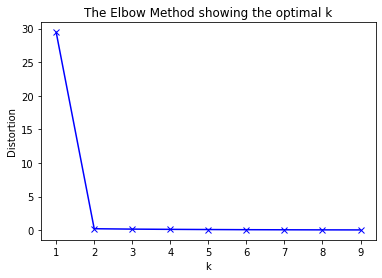

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

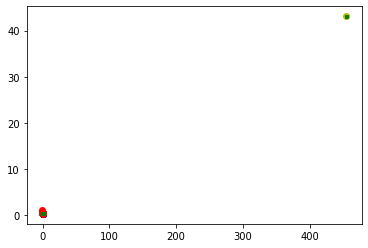

In [13]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(X,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [14]:
print(returns.idxmax())


Returns       HDFC
Volatility    HDFC
dtype: object


In [0]:
returns.drop('HDFC',inplace=True)
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

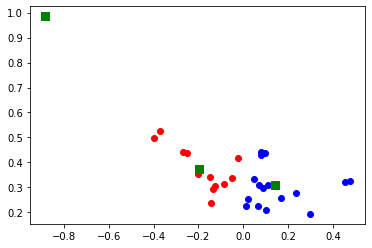

In [16]:
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

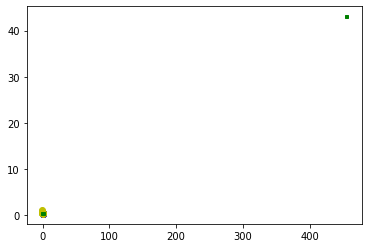

In [17]:
centroids,_ = kmeans(X,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [18]:
print(returns.idxmax())

Returns       TITAN
Volatility     Rcom
dtype: object


In [0]:
returns.drop('TITAN',inplace=True)
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

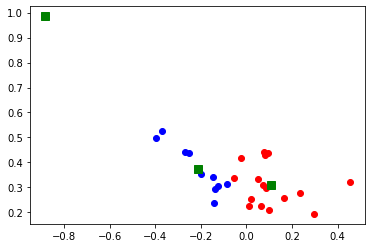

In [20]:
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [21]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('Adaniports', 2)
('ASIANPAINT', 2)
('AXISBANK', 2)
('Bajfinance', 2)
('Bpcl', 0)
('CIPLA', 2)
('DRREDDY', 2)
('Eichermot', 0)
('GAIL', 2)
('HDFCBANK', 2)
('HEROMOTOCO', 0)
('HINDALCO', 2)
('HINDUNILVR', 2)
('IDFC', 0)
('INFRATEL', 0)
('INFY', 2)
('IOC', 0)
('ITC', 2)
('ITDC', 0)
('LT', 0)
('Mm', 0)
('MARUTI', 2)
('NCC', 2)
('Pvr', 2)
('Rcom', 1)
('RELIANCE', 2)
('SUNPHARMA', 0)
('TCS', 2)
